# Age Prediction through Health and Lifestlye Data: A Supervised Machine Learning Approach

#### Created by: Dalrae Jin
#### Course: DTSA 5509 Introduction to Machine Learning: Supervised Learning

* Github repo URL: https://github.com/dalrae-jin/age_prediction_ML

### About the Project

#### What is this project about?
    
This project is focused on predicting a **person's age or age group** based on a variety of health and lifestyle factors. It involves building both regression and classification models using a dataset that includes features like gender, height, weight, blood pressure, cholesterol levels, BMI, physical activity, smoking status, and more. The project explores different machine learning methods, **regression** (for 'Age') and **classification** ('Age Group'). Additionally, it investigates how features interact with each other and their relevance in predicting the target variable (age or age group).

*Disclaimer: This project/data focuses on predicting 'Age,' not life expectancy. To be completely honest, I initially mistook this data for information related to life expectancy when I first saw it. ;)*

#### What is the goal of this project?

1. To build accurate models for predicting age (using regression) and age groups (using classification) based on various health and lifestyle data.

2. To evaluate the most significant factors that contribute to the predictions, and assess whether these factors are practical and meaningful for real-world applications, such as in marketing or healthcare. 

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

<br>

## 1. Data Collection

* Data Source: https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset
* The given data sets are `train.csv` and `test.csv`. However, `test.csv` is just a copy of `train.csv` without `Age` column. So, I am going to use `train.csv` only for this project.
* The size of `train.csv` is *970.65 KB* and it is in *CSV file* format.
  
* Data Description: This dataset contains synthetic data designed for predicting (or estimating) age based on various health and lifestyle factors. It includes **3,000 rows** with **26 columns**, each representing different aspects of physical health and lifestyle.


* Data Features:

|Variable |	Description|
|:---------|:-------------|
|Gender| The gender of the individual|
|Height (cm)| The height of the individual in centimeters.||Weight (kg)| The weight of the individual in kilogram.|
|Blood Pressure (s/d)| Blood pressure (systolic/diastolic) in mmHg.|
|Cholesterol Level (mg/dL)| Cholesterol level in milligrams per deciliter.|
|BMI| Body Mass Index, calculated from height and weight.|
|Blood Glucose Level (mg/dL)| Blood glucose level in milligrams per deciliter|
|Bone Density (g/cm²)| Bone density in grams per square centimeter.|
|Vision Sharpness | Vision sharpness on a scale from 0 (blurry) to 100 (perfect).|
|Hearing Ability (dB)| Hearing ability in decibels.|
|Physical Activity Level| Categorized as 'Low', 'Moderate', or 'High'.|
|Smoking Status| Categorical values including 'Never', 'Former', and 'Current'.|
|Alcohol Consumption| Frequency of alcohol consumption.|
|Diet| Type of diet, categorized as 'Balanced', 'High Protein', 'Low Carb', etc.|
|Chronic Diseases| Presence of chronic diseases (e.g., diabetes, hypertension).|
|Medication Use| Usage of medication.|
|Family History| Presence of family history of age-related conditions.|
|Cognitive Function| Self-reported cognitive function on a scale from 0 (poor) to 100 (excellent).|
|Mental Health Status| Self-reported mental health status on a scale from 0 (poor) to 100 (excellent).|
|Sleep Patterns| Average number of sleep hours per night.|
|Stress Levels| Self-reported stress levels on a scale from 0 (low) to 100 (high).|
|Pollution Exposure| Exposure to pollution measured in arbitrary units.|
|Sun Exposure| Average sun exposure in hours per week.|
|Education Level| Highest level of education attained.|
|Income Level| Annual income in USD.|
|Age (years)| The target variable representing the age of the individual.|


In [5]:
# import the csv file 
df = pd.read_csv('human-age-prediction-synthetic-dataset/train.csv')

Let's check out `df`.

In [7]:
# the number of rows and columns
print(df.shape)

# first five rows
df.head()

(3000, 26)


Gender  Height (cm)  Weight (kg) Blood Pressure (s/d)  \
0    Male   171.148359    86.185197              151/109   
1    Male   172.946206    79.641937              134/112   
2  Female   155.945488    49.167058              160/101   
3  Female   169.078298    56.017921               133/94   
4  Female   163.758355    73.966304              170/106   

   Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
0                 259.465814  29.423017                   157.652848   
1                 263.630292  26.626847                   118.507805   
2                 207.846206  20.217553                   143.587550   
3                 253.283779  19.595270                   137.448581   
4                 236.119899  27.582078                   145.328695   

   Bone Density (g/cm²)  Vision Sharpness  Hearing Ability (dB)  ...  \
0              0.132868          0.200000             58.786198  ...   
1              0.629534          0.267312             54.635270  ...   
2              0.473487          0.248667             54.564632  ...   
3              1.184315          0.513818             79.722963  ...   
4              0.434562          0.306864             52.479469  ...   

  Family History Cognitive Function Mental Health Status Sleep Patterns  \
0            NaN          44.059172                 Good       Insomnia   
1  Heart Disease          45.312298                 Good         Normal   
2   Hypertension          56.246991                 Poor       Insomnia   
3   Hypertension          55.196092                 Poor       Insomnia   
4            NaN          53.023379                 Good         Normal   

  Stress Levels Pollution Exposure Sun Exposure  Education Level Income Level  \
0      2.797064           5.142344     7.108975              NaN       Medium   
1      9.339930           7.272720     3.918489    Undergraduate       Medium   
2      9.234637           8.500386     5.393408              NaN       Medium   
3      4.693446           7.555511     2.745578              NaN          Low   
4      4.038537           9.429097     3.878435    Undergraduate         High   

  Age (years)  
0          89  
1          77  
2          70  
3          52  
4          79  

[5 rows x 26 columns]

In [8]:
# column names
df.columns

Index(['Gender', 'Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)',
       'Cholesterol Level (mg/dL)', 'BMI', 'Blood Glucose Level (mg/dL)',
       'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diet', 'Chronic Diseases', 'Medication Use', 'Family History',
       'Cognitive Function', 'Mental Health Status', 'Sleep Patterns',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Education Level', 'Income Level', 'Age (years)'],
      dtype='object')

In [9]:
# checking data types for each column
# df.dtypes # just the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [10]:
# getting the summary of the data
df.describe(include='all').T

count unique            top  freq        mean  \
Gender                         3000      2         Female  1511         NaN   
Height (cm)                  3000.0    NaN            NaN   NaN  168.590835   
Weight (kg)                  3000.0    NaN            NaN   NaN    72.53726   
Blood Pressure (s/d)           3000   1606         135/93     9         NaN   
Cholesterol Level (mg/dL)    3000.0    NaN            NaN   NaN  234.029794   
BMI                          3000.0    NaN            NaN   NaN   25.550146   
Blood Glucose Level (mg/dL)  3000.0    NaN            NaN   NaN  126.653909   
Bone Density (g/cm²)         3000.0    NaN            NaN   NaN    0.931899   
Vision Sharpness             3000.0    NaN            NaN   NaN    0.474591   
Hearing Ability (dB)         3000.0    NaN            NaN   NaN   47.016214   
Physical Activity Level        3000      3       Moderate  1407         NaN   
Smoking Status                 3000      3         Former  1181         NaN   
Alcohol Consumption            1799      2     Occasional  1057         NaN   
Diet                           3000      4       Balanced  1183         NaN   
Chronic Diseases               1701      3   Hypertension   676         NaN   
Medication Use                 1802      2        Regular  1063         NaN   
Family History                 1549      3       Diabetes   645         NaN   
Cognitive Function           3000.0    NaN            NaN   NaN   63.868376   
Mental Health Status           3000      4           Good  1073         NaN   
Sleep Patterns                 3000      3         Normal  1519         NaN   
Stress Levels                3000.0    NaN            NaN   NaN    5.476507   
Pollution Exposure           3000.0    NaN            NaN   NaN    5.028982   
Sun Exposure                 3000.0    NaN            NaN   NaN    5.955785   
Education Level                2373      3  Undergraduate   884         NaN   
Income Level                   3000      3         Medium  1223         NaN   
Age (years)                  3000.0    NaN            NaN   NaN   53.485667   

                                   std         min         25%         50%  \
Gender                             NaN         NaN         NaN         NaN   
Height (cm)                   9.293006  141.130985  161.629515  168.215632   
Weight (kg)                  13.190734   32.537672   63.222773   71.448651   
Blood Pressure (s/d)               NaN         NaN         NaN         NaN   
Cholesterol Level (mg/dL)    24.521436  148.811514  216.756601  234.376822   
BMI                           4.367322     12.0499   22.454115   25.352113   
Blood Glucose Level (mg/dL)  18.226124   69.866884  114.392605  126.802186   
Bone Density (g/cm²)           0.44355   -0.219787    0.561063    0.939585   
Vision Sharpness              0.209726         0.2    0.281671     0.46207   
Hearing Ability (dB)         14.336464         0.0   36.734775   46.963733   
Physical Activity Level            NaN         NaN         NaN         NaN   
Smoking Status                     NaN         NaN         NaN         NaN   
Alcohol Consumption                NaN         NaN         NaN         NaN   
Diet                               NaN         NaN         NaN         NaN   
Chronic Diseases                   NaN         NaN         NaN         NaN   
Medication Use                     NaN         NaN         NaN         NaN   
Family History                     NaN         NaN         NaN         NaN   
Cognitive Function           11.755738   30.382098   55.647794   64.014652   
Mental Health Status               NaN         NaN         NaN         NaN   
Sleep Patterns                     NaN         NaN         NaN         NaN   
Stress Levels                 2.584901    1.000428    3.221745    5.496618   
Pollution Exposure            2.871408    0.006395    2.607185    5.095686   
Sun Exposure                  3.474595    0.002055    2.873285    5.956789   
Education Level         

In [11]:
# cheking how many null values in the dataset
null_counts = df.isnull().sum()
print(null_counts)

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64


<br>

## 2. Data Cleaning

Here is the **To-Do list for Data Cleaning**:

    2-1. Address missing data by implementing appropriate imputation or removal techniques.

    2-2. Convert data types to ensure compatibility and efficiency for analysis.

    2-3. Create a new column - 'Age Group' for later analysis and modeling.


### 2-1. Handling Missing Data

There are five columns with missing values: **'Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History'**, and **'Education Level'**. All of these columns are of type 'object' and each has 2 to 3 unique values. 

Especially, **'Alcohol Consumption', 'Chronic Diseases', 'Medication Use'**, and **'Family History'** have more than *40%* missing data. *It is generally recommended to consider removing a column or row if there is more than 30% missing data.*

**Upon further investigation of the data source, it turns out that these are not actually missing values. They represent 'None'. For example, 'Alcohol Consumption' has three categories: 'None', 'Occasional', and 'Frequent'.**


In [14]:
# Select object (categorical) columns
# categorical_cols = df.select_dtypes(include=['object']).columns
none_val_col = ['Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History', 'Education Level']

# Display unique categories for each object column
for col in none_val_col:
    print(f"Column: {col}")
    print(df[col].unique())
    print("\n")

Column: Alcohol Consumption
[nan 'Occasional' 'Frequent']


Column: Chronic Diseases
[nan 'Hypertension' 'Diabetes' 'Heart Disease']


Column: Medication Use
[nan 'Regular' 'Occasional']


Column: Family History
[nan 'Heart Disease' 'Hypertension' 'Diabetes']


Column: Education Level
[nan 'Undergraduate' 'High School' 'Postgraduate']




In [15]:
# Replace null values with 'None' for the selected columns
df[none_val_col] = df[none_val_col].fillna('None')

# Verify the changes
for col in none_val_col:
    print(f"Updated categories for {col}: {df[col].unique()}")

Updated categories for Alcohol Consumption: ['None' 'Occasional' 'Frequent']
Updated categories for Chronic Diseases: ['None' 'Hypertension' 'Diabetes' 'Heart Disease']
Updated categories for Medication Use: ['None' 'Regular' 'Occasional']
Updated categories for Family History: ['None' 'Heart Disease' 'Hypertension' 'Diabetes']
Updated categories for Education Level: ['None' 'Undergraduate' 'High School' 'Postgraduate']


In [16]:
# Checking missing values to confirm
df.isnull().sum()

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
dtype: int64

<br>

### 2-2. Convert Data Types

Some columns may need type conversion to ensure smooth analysis:

1. Numeric Conversion: Convert 'Blood Pressure'
2. Categorical Variables: Convert columns with `object` data type, except 'Blood Pressure'


In [18]:
# Convert 'Blood Pressure' 
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
df.drop(columns='Blood Pressure (s/d)', inplace=True)

# Reorder columns
# Get the current list of columns
current_columns = df.columns.tolist()

# Define the new order of columns
new_order = current_columns[:3] + ['Systolic_BP', 'Diastolic_BP'] + current_columns[3:-2]

# Reorder the DataFrame columns
df = df[new_order]

df.dtypes

Gender                          object
Height (cm)                    float64
Weight (kg)                    float64
Systolic_BP                    float64
Diastolic_BP                   float64
Cholesterol Level (mg/dL)      float64
BMI                            float64
Blood Glucose Level (mg/dL)    float64
Bone Density (g/cm²)           float64
Vision Sharpness               float64
Hearing Ability (dB)           float64
Physical Activity Level         object
Smoking Status                  object
Alcohol Consumption             object
Diet                            object
Chronic Diseases                object
Medication Use                  object
Family History                  object
Cognitive Function             float64
Mental Health Status            object
Sleep Patterns                  object
Stress Levels                  float64
Pollution Exposure             float64
Sun Exposure                   float64
Education Level                 object
Income Level             

In [19]:
# Select object data type columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert object to category
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       3000 non-null   category
 1   Height (cm)                  3000 non-null   float64 
 2   Weight (kg)                  3000 non-null   float64 
 3   Systolic_BP                  3000 non-null   float64 
 4   Diastolic_BP                 3000 non-null   float64 
 5   Cholesterol Level (mg/dL)    3000 non-null   float64 
 6   BMI                          3000 non-null   float64 
 7   Blood Glucose Level (mg/dL)  3000 non-null   float64 
 8   Bone Density (g/cm²)         3000 non-null   float64 
 9   Vision Sharpness             3000 non-null   float64 
 10  Hearing Ability (dB)         3000 non-null   float64 
 11  Physical Activity Level      3000 non-null   category
 12  Smoking Status               3000 non-null   category
 13  Alc

<br>

### 2-3. Create a new column

While processing the data, I thought about how the age prediction results could be applied in different settings, such as by marketing companies. I also wondered if predicting age groups—i.e., through classification—might be more useful and accurate than predicting age as a continuous variable through regression. 

Since the 'Age (years)' column is continuous and used for regression, I would like to create a column representing age groups for classification.

The minimum value of 'Age' is 18, and the maximum value of 'Age' is 89. I divide the age group as follow:

    * Age 18 ~ 31 : Young (meaning Young Adults)
    * Age 32 ~ 45 : Adults
    * Age 46 ~ 59 : Middle-aged
    * Age 60 ~ 74 : Senior
    * Age 75 ~ 89 : Elderly

In [21]:
# Create age groups
df['Age Group'] = pd.cut(df['Age (years)'], bins=[17, 32, 46, 60, 75, 90], labels=['Young', 'Adults', 'Middle-aged', 'Senior', 'Elderly'])

# Check if the data of this feature is balanced
df['Age Group'].value_counts()

Age Group
Adults         624
Middle-aged    600
Young          596
Senior         596
Elderly        584
Name: count, dtype: int64

In [22]:
# Check the data types and Non-Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Gender                       3000 non-null   category
 1   Height (cm)                  3000 non-null   float64 
 2   Weight (kg)                  3000 non-null   float64 
 3   Systolic_BP                  3000 non-null   float64 
 4   Diastolic_BP                 3000 non-null   float64 
 5   Cholesterol Level (mg/dL)    3000 non-null   float64 
 6   BMI                          3000 non-null   float64 
 7   Blood Glucose Level (mg/dL)  3000 non-null   float64 
 8   Bone Density (g/cm²)         3000 non-null   float64 
 9   Vision Sharpness             3000 non-null   float64 
 10  Hearing Ability (dB)         3000 non-null   float64 
 11  Physical Activity Level      3000 non-null   category
 12  Smoking Status               3000 non-null   category
 13  Alc

<br>

## 3. Exploratory Data Analysis (EDA)

Let's exlpore the data and gain some insights from it.

    3-1. Checking the distribution of the values for each column
    3-2. Correlation and pair plot
    3-3. Outlier detection

### 3-1. Distribution of the values for each column

    (1) Create distribution plots for categorical columns - Bar plot

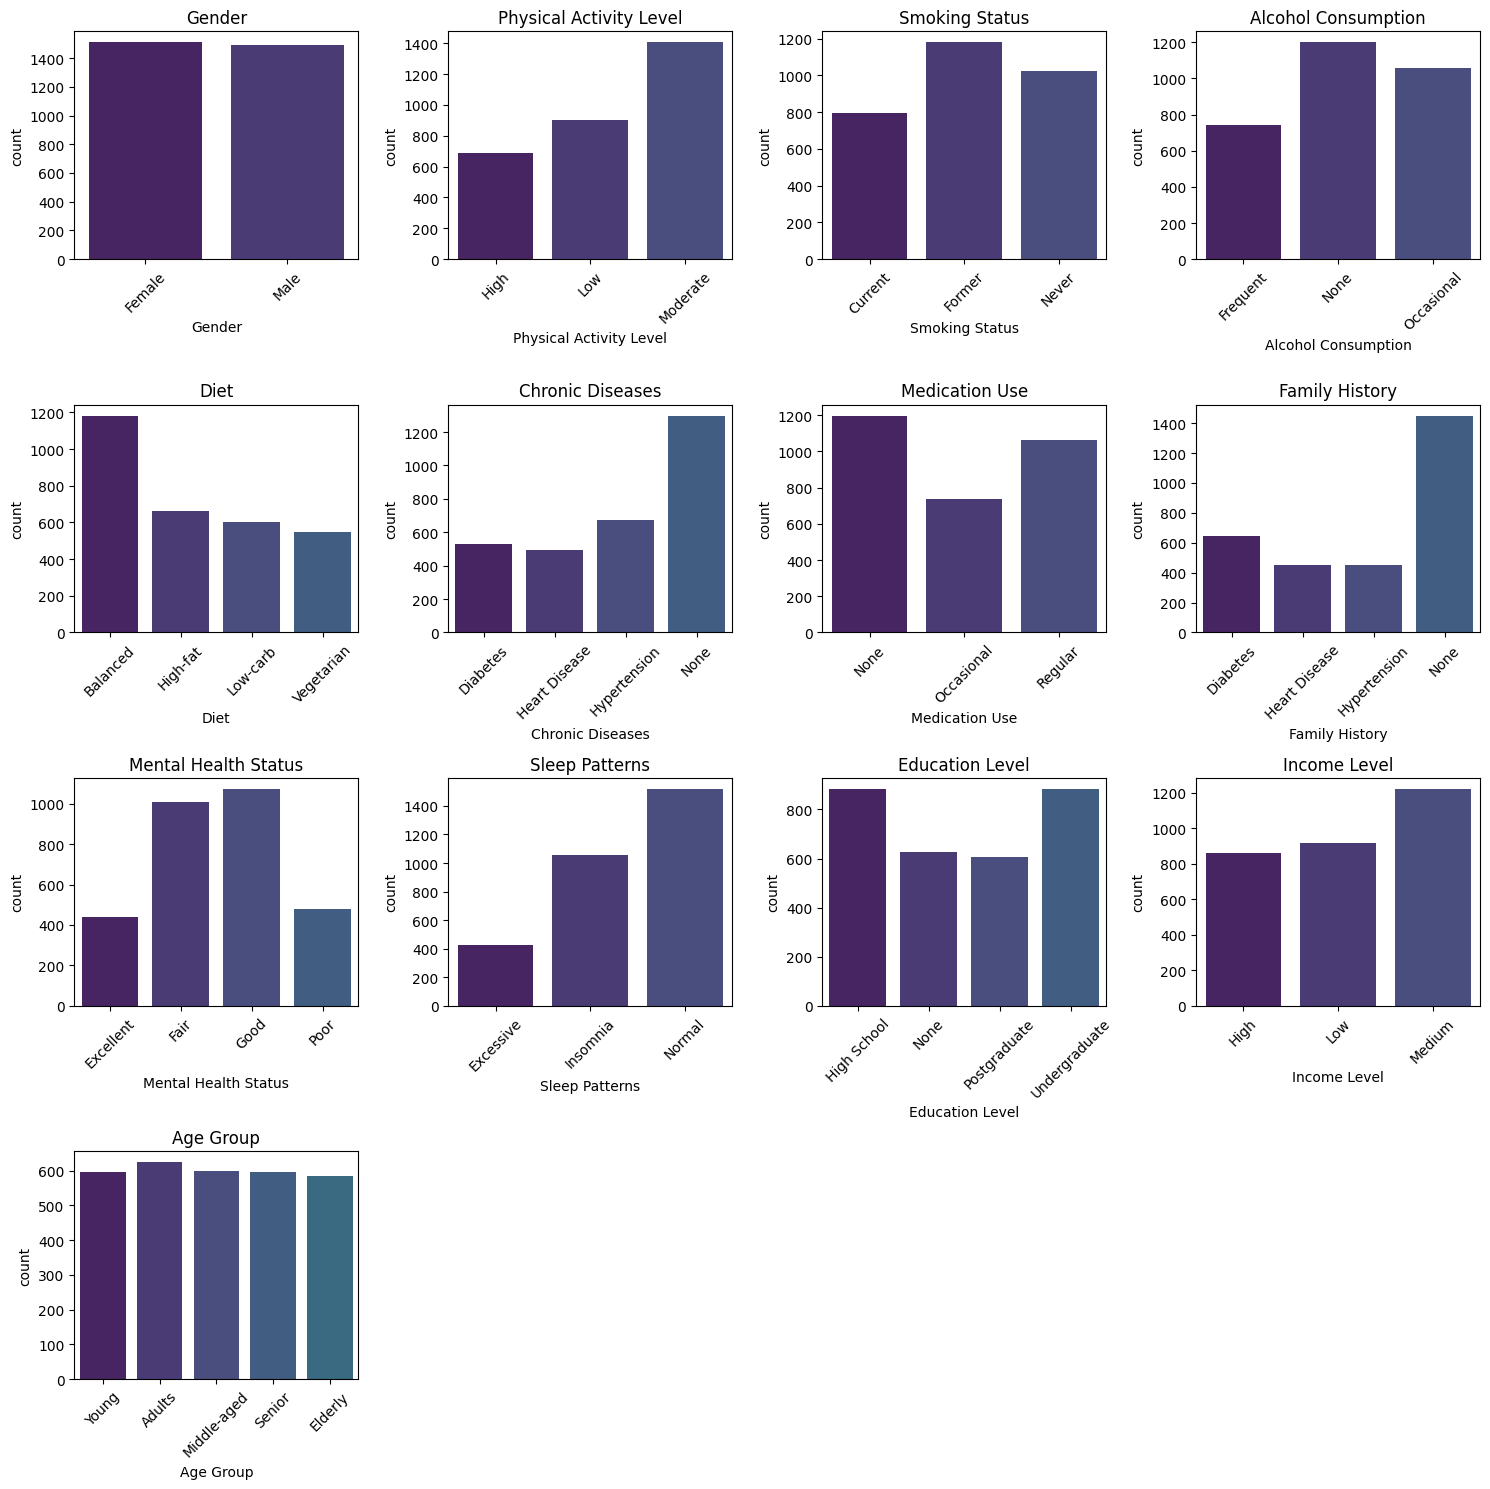

In [25]:
# Set the figure size
plt.figure(figsize=(15, 15))

# columns with category data type
categorical_cols = df.select_dtypes(include=['category']).columns

# Define a color palette
palette = sns.color_palette("viridis", n_colors=len(categorical_cols))

# Plot bar plots for categorical columns
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size (rows, columns) as needed
    sns.countplot(x=df[col], palette=palette)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

    (2) Create distribution plots for numerical columns - Histogram

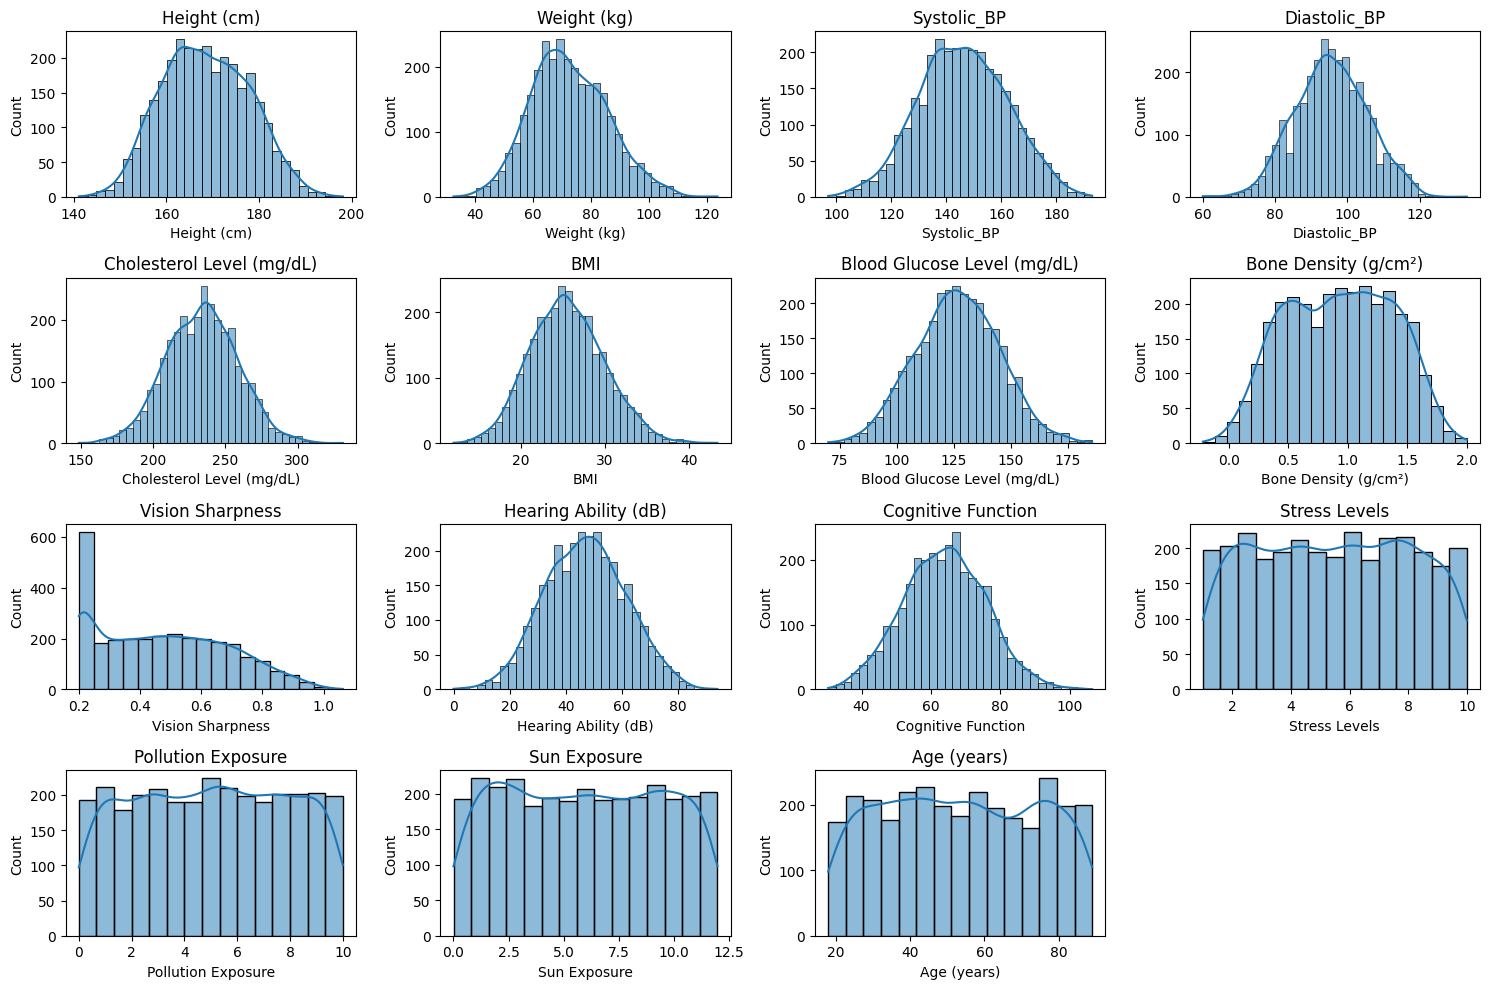

In [27]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot histograms for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size (rows, columns) as needed
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

<br>

### 3-2. Correlation and Pair Plot

    (1) Correlation plot 

First, we need to encode categorical values since `df.corr()` only works on numerical values.

In [29]:
# Label encoding: Converts each category to a unique integer
# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the original DataFrame
df_encoded = df.copy()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])


In [30]:
# Compute the correlation matrix
df_encoded.corr()

Gender  Height (cm)  Weight (kg)  Systolic_BP  \
Gender                       1.000000     0.717322     0.566511    -0.003119   
Height (cm)                  0.717322     1.000000     0.398371    -0.010840   
Weight (kg)                  0.566511     0.398371     1.000000    -0.013897   
Systolic_BP                 -0.003119    -0.010840    -0.013897     1.000000   
Diastolic_BP                 0.011674     0.023508     0.005607     0.397156   
Cholesterol Level (mg/dL)   -0.005063    -0.027233     0.041859     0.267289   
BMI                          0.142106    -0.222789     0.800150    -0.001913   
Blood Glucose Level (mg/dL)  0.007766     0.011990     0.015960     0.266494   
Bone Density (g/cm²)        -0.026159    -0.023558    -0.008140    -0.608813   
Vision Sharpness            -0.009677    -0.009272     0.000436    -0.577645   
Hearing Ability (dB)         0.004466     0.009461     0.008944     0.450164   
Physical Activity Level     -0.024434    -0.033521     0.000627     0.018741   
Smoking Status               0.016654     0.011659     0.015235    -0.105643   
Alcohol Consumption          0.006652    -0.012227    -0.002520     0.055334   
Diet                        -0.009409    -0.028934     0.021480     0.013496   
Chronic Diseases             0.003541     0.077946    -0.178077     0.003261   
Medication Use              -0.009224    -0.054528     0.140216    -0.001838   
Family History               0.001055     0.023713    -0.089558     0.009765   
Cognitive Function           0.004205     0.018231     0.006220    -0.313964   
Mental Health Status        -0.021671     0.001687    -0.012745     0.011486   
Sleep Patterns               0.019013    -0.009392     0.040154     0.018506   
Stress Levels               -0.012584    -0.006537     0.016620     0.015454   
Pollution Exposure          -0.014511    -0.028681    -0.029717    -0.000868   
Sun Exposure                 0.004378     0.001900    -0.013118     0.005985   
Education Level              0.023413     0.040963     0.033897    -0.003455   
Income Level                -0.028838    -0.039367    -0.033797    -0.038251   
Age (years)                  0.021714     0.020322     0.002521     0.646056   
Age Group                    0.006492     0.000475    -0.002014    -0.176860   

                             Diastolic_BP  Cholesterol Level (mg/dL)  \
Gender                           0.011674                  -0.005063   
Height (cm)                      0.023508                  -0.027233   
Weight (kg)                      0.005607                   0.041859   
Systolic_BP                      0.397156                   0.267289   
Diastolic_BP                     1.000000                   0.267601   
Cholesterol Level (mg/dL)        0.267601                   1.000000   
BMI                             -0.007905                   0.065532   
Blood Glucose Level (mg/dL)      0.243431                   0.189589   
Bone Density (g/cm²)            -0.567631                  -0.401220   
Vision Sharpness                -0.544801                  -0.382170   
Hearing Ability (dB)             0.438638                   0.328465   
Physical Activity Level         -0.007879                  -0.001160   
Smoking Status                  -0.098914                  -0.062432   
Alcohol Consumption              0.019766                   0.010072   
Diet                            -0.009196                   0.028135   
Chronic Diseases                -0.002968                   0.000310   
Medication Use                   0.017421                   0.020899   
Family History                  -0.023279                   0.007841   
Cognitive Function              -0.317081                  -0.230204   
Mental Health Status             0.009969                   0.018620   
Sleep Patterns                   0.014928                   0.002145   
Stress Levels                    0.027509                   0.001813   
Pollution Exposure              -0.014652             

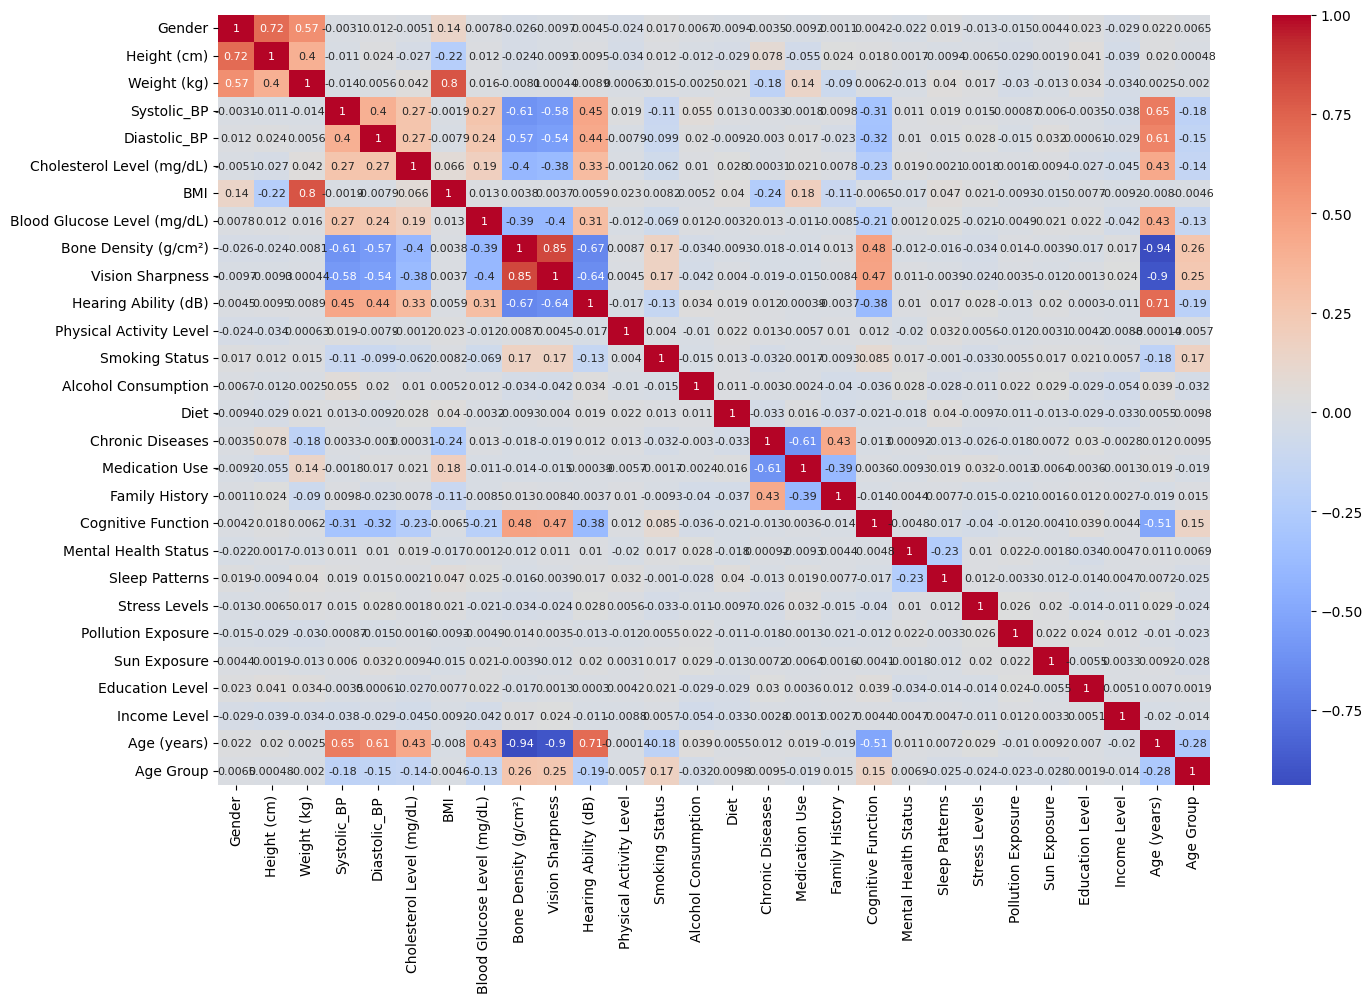

In [31]:
# visualizing correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()

Let's remove the features that have close to zero correlation and examine the positive and negative correlation values more closely.

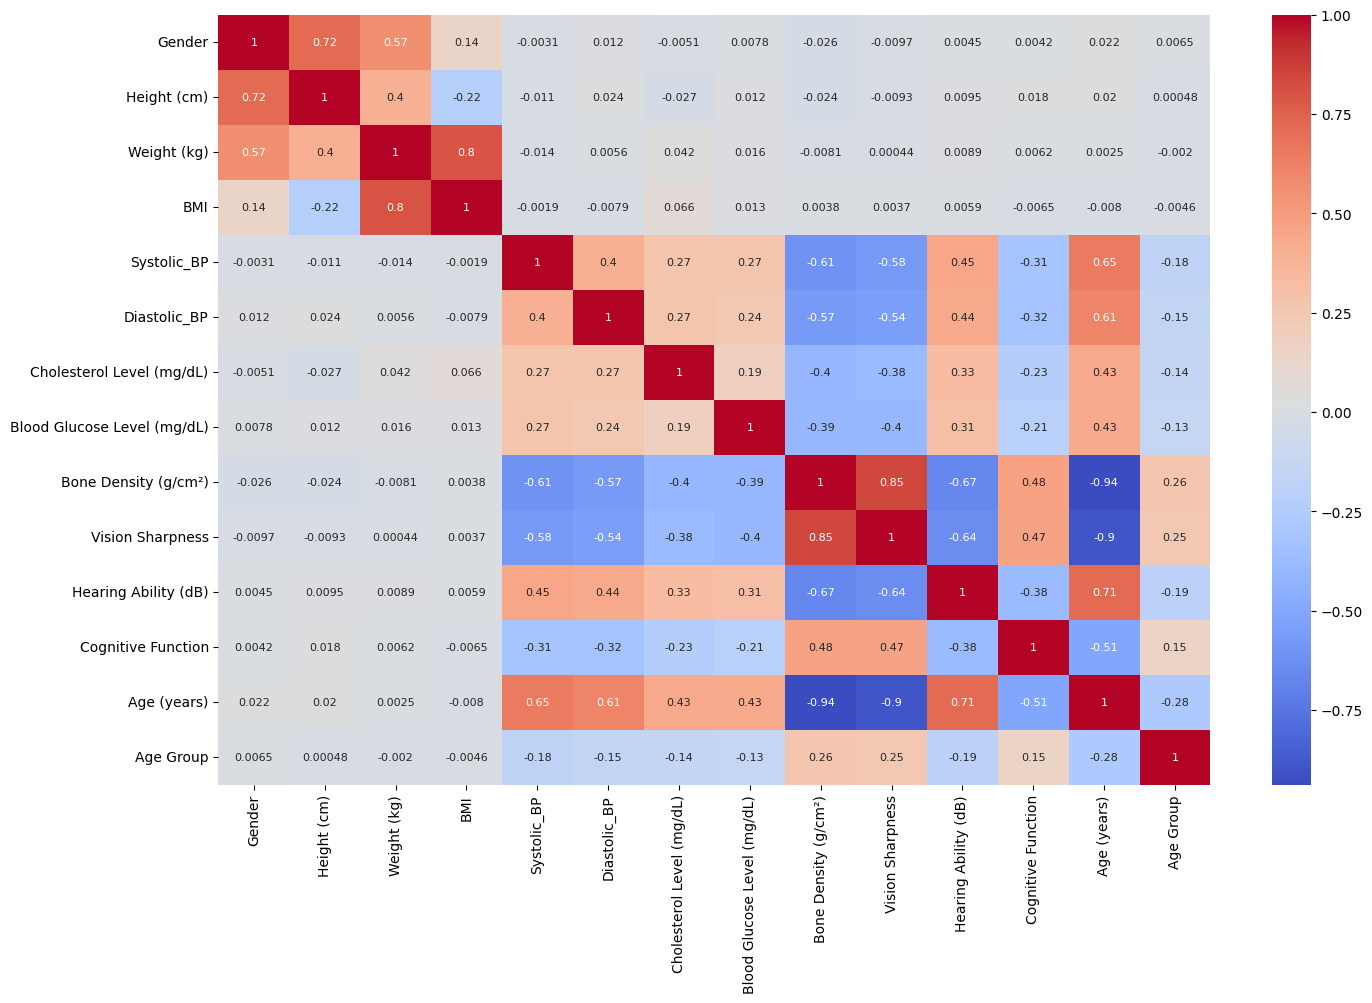

In [33]:
# Selecting columns with meaningful correlations (not close to zero, not grey)
columns_of_interest = [
    'Gender', 'Height (cm)', 'Weight (kg)', 'BMI', 'Systolic_BP', 
    'Diastolic_BP', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 
    'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)', 
    'Cognitive Function', 'Age (years)', 'Age Group'
]

df_col_interest = df_encoded[columns_of_interest]

# visualizing correlation matrix only with columns with meaningful correlations using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df_col_interest.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.show()

As we can see from the heatmap above, some features exhibit high correlations. For example, Weight and BMI have a correlation of 0.8, and Bone Density and Vision Sharpness are correlated at 0.85. Generally, correlations higher than 0.7 are considered problematic as they indicate **multicollinearity**. I will keep these observations in mind and consider them during the feature selection process in the modeling step.

    (2) Pair plot

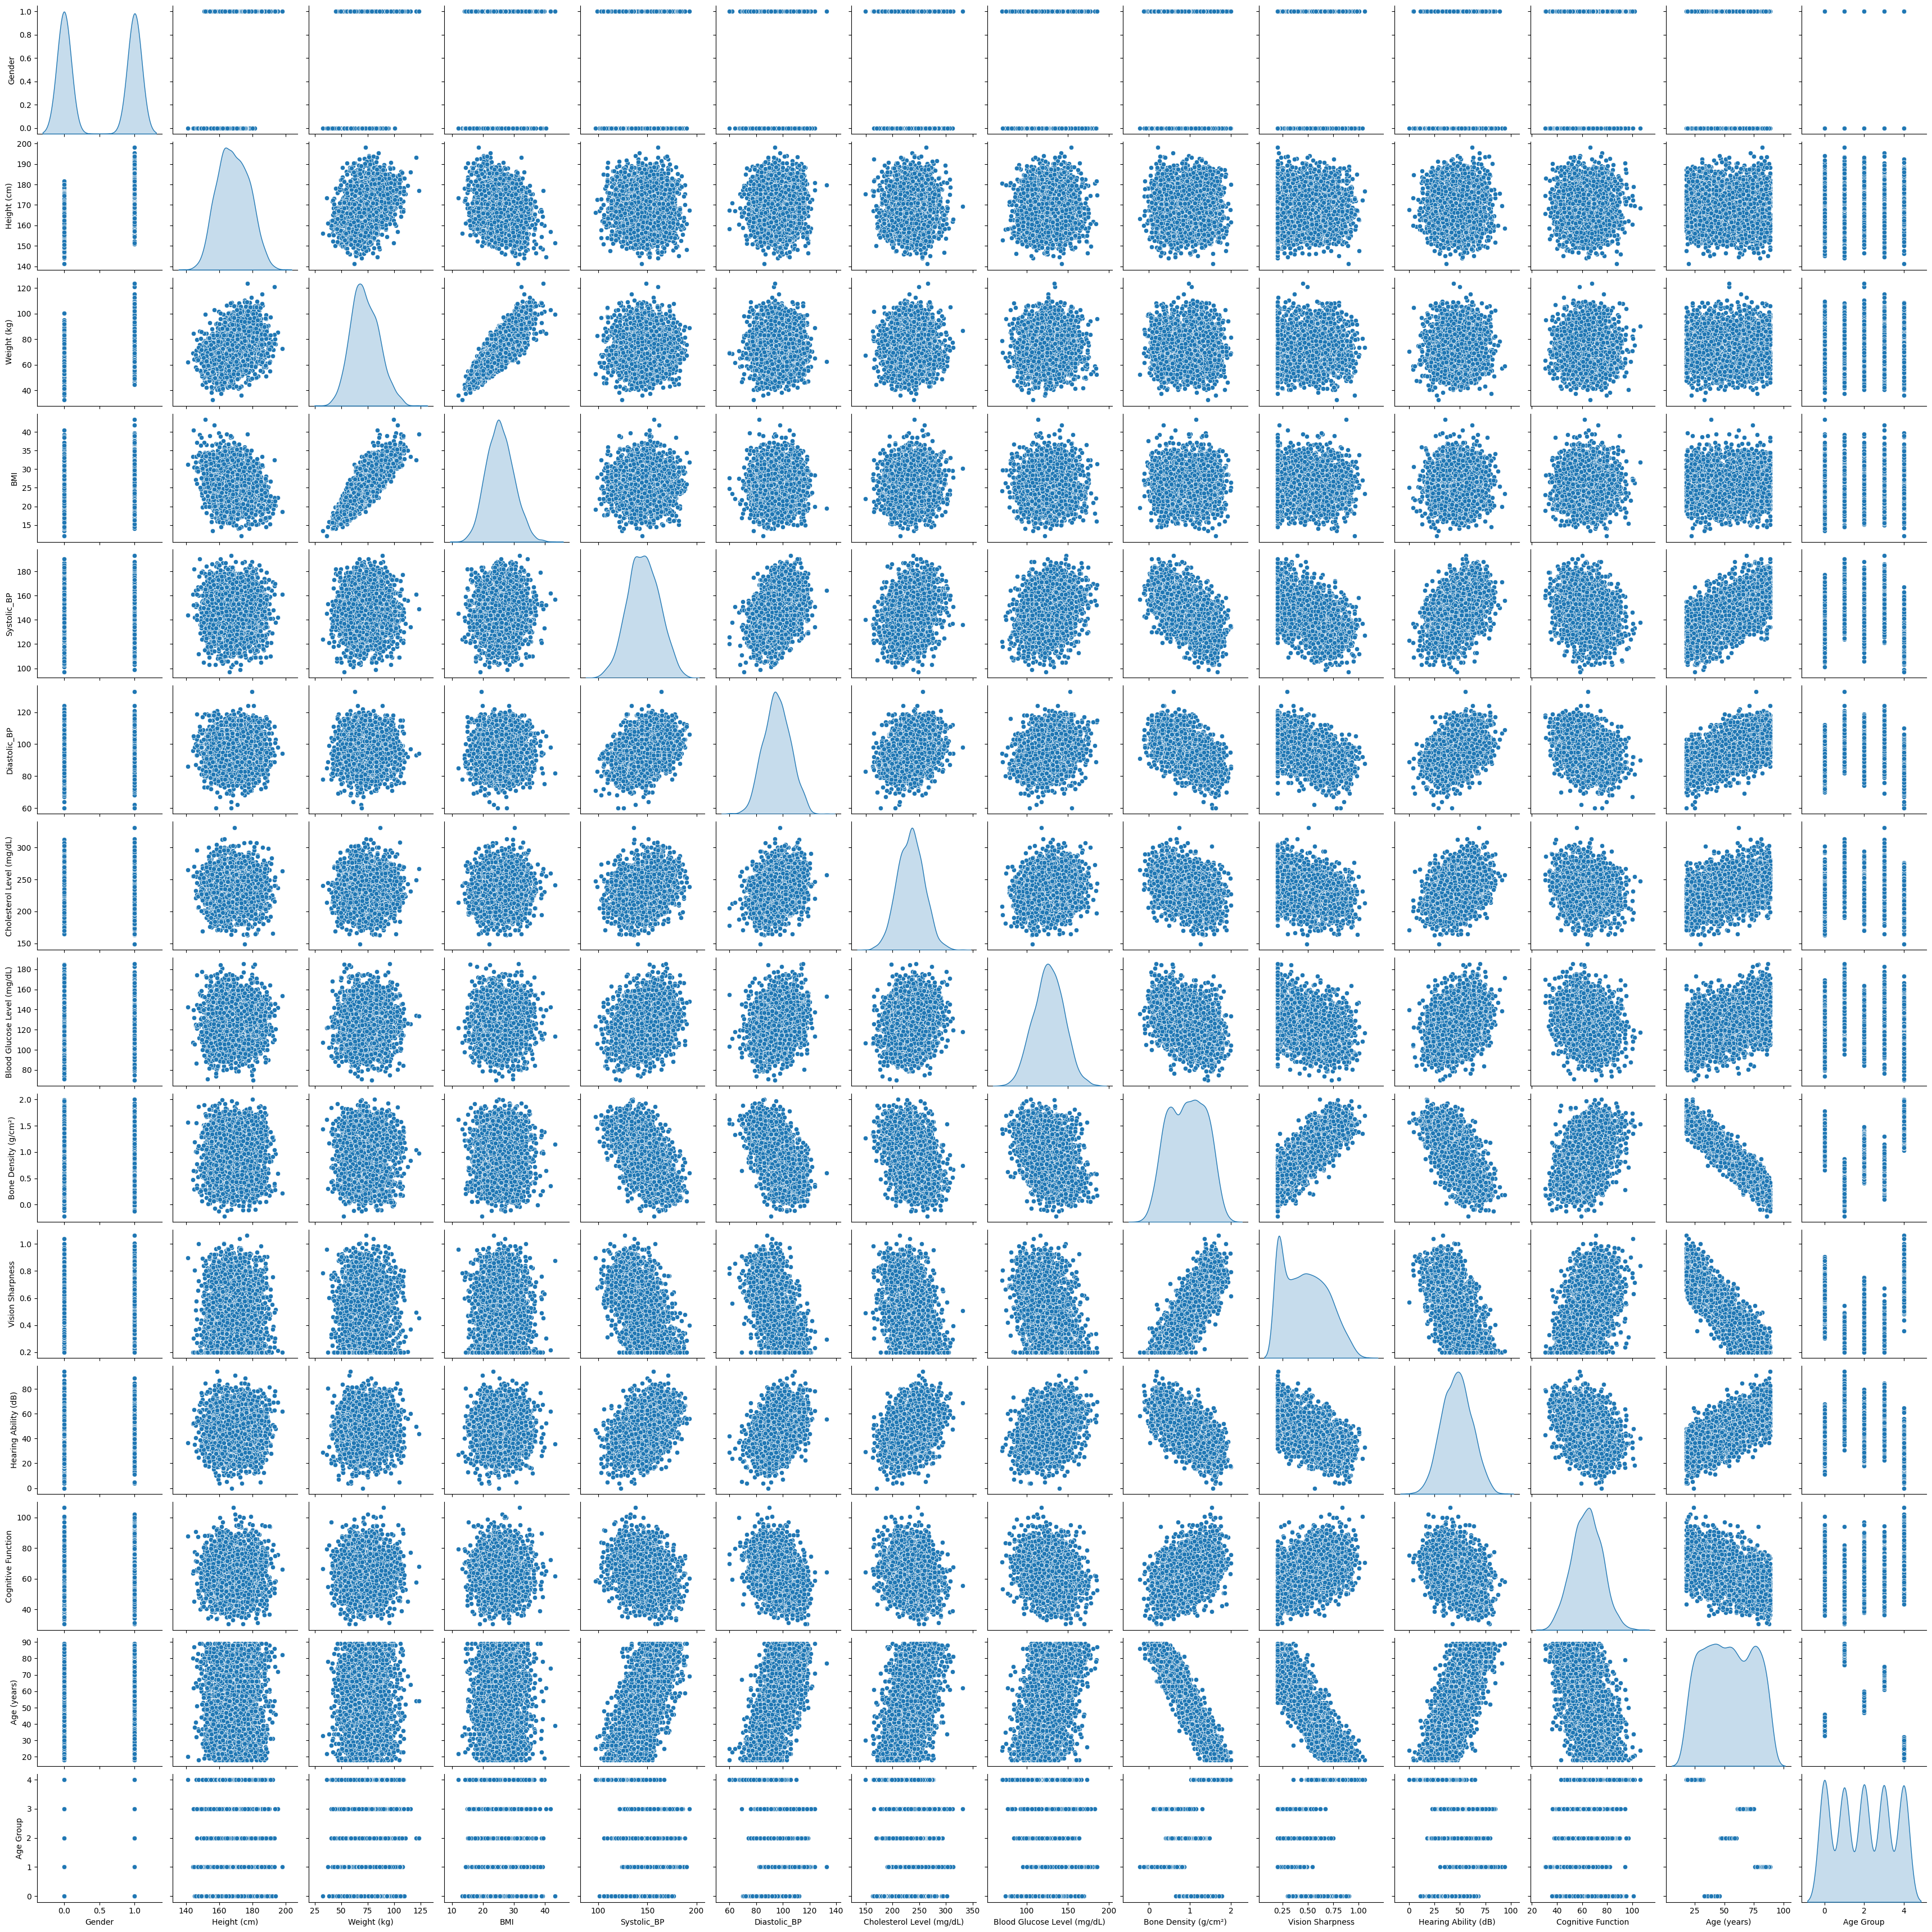

In [36]:
# Inspecting relationships between features using a pair plot. 
sns.pairplot(df_col_interest, diag_kind='kde')
plt.show()

<br>

### 3-3. Outlier Detection

    (1) Box plots to visualize potential outliers for numerical columns(features)

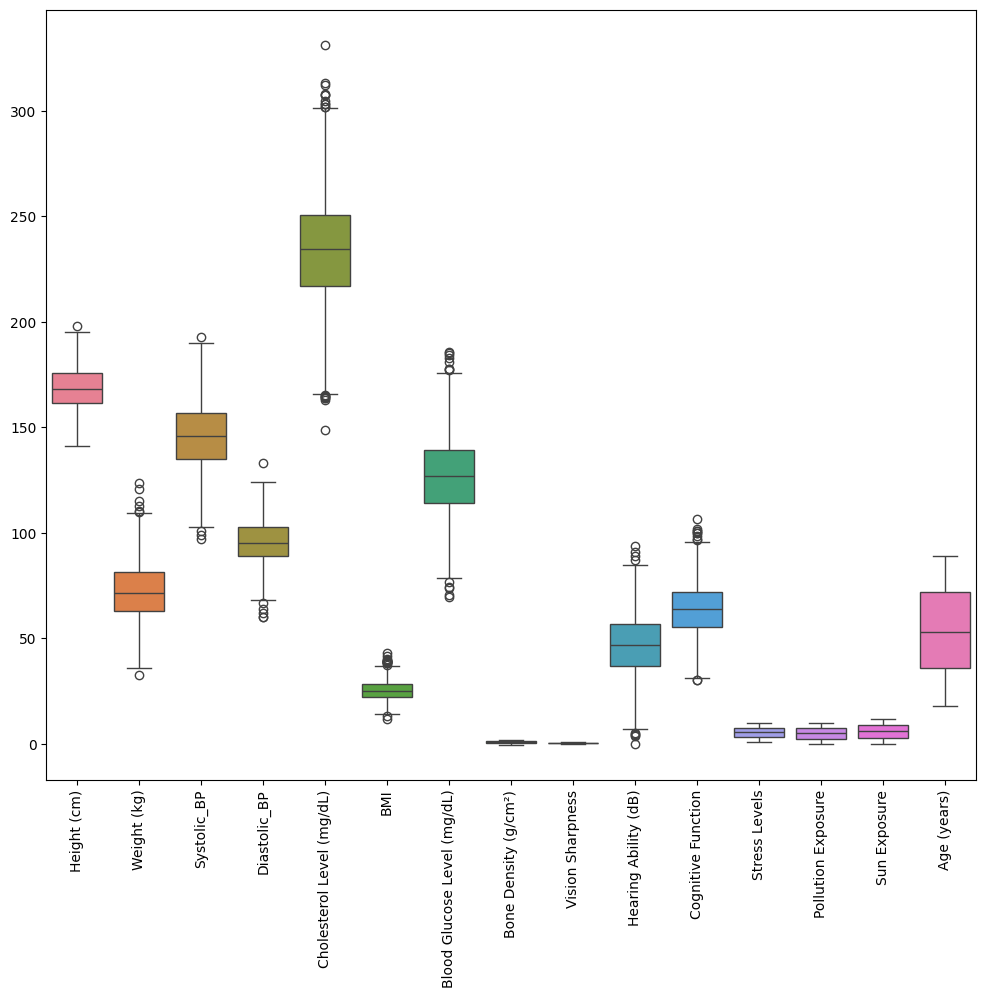

In [38]:
# Box plot for numerical features
plt.figure(figsize=(12, 10))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.show()

    (2) Scatter plot for detecting outliers

    The box plot above suggests that the feature 'Cholesterol Level (mg/dL)' has some potential outliers that could affect the analysis later. To investigate this further, let's examine these outliers using a scatter plot.

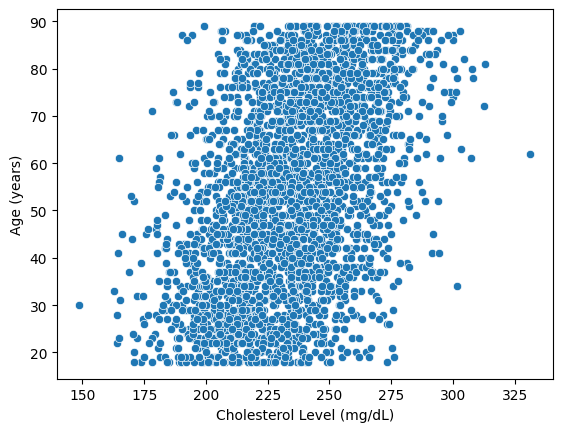

In [40]:
sns.scatterplot(x=df['Cholesterol Level (mg/dL)'], y=df['Age (years)'])
plt.show()

In [41]:
# z-score method to see how many points are more than 3 standard deviatons away for 'Cholesterol Level (mg/dL)'
z_scores = np.abs(stats.zscore(df['Cholesterol Level (mg/dL)']))
outliers = np.where(z_scores > 3)

# Print the potential outliers
print(df.iloc[outliers])

      Gender  Height (cm)  Weight (kg)  Systolic_BP  Diastolic_BP  \
850     Male   169.396769    86.534379        136.0          98.0   
1098  Female   161.857668    77.663548        137.0         112.0   
1238    Male   175.288753    67.521345        140.0          83.0   
2334    Male   163.018696    73.720358        151.0          94.0   
2878    Male   178.571719   105.256475        160.0         111.0   

      Cholesterol Level (mg/dL)        BMI  Blood Glucose Level (mg/dL)  \
850                  331.300589  30.156326                   117.661665   
1098                 312.360851  29.644946                   131.156393   
1238                 148.811514  21.975207                   106.530970   
2334                 313.102934  27.740393                   119.503533   
2878                 307.920410  33.008323                   128.735455   

      Bone Density (g/cm²)  Vision Sharpness  ...  Cognitive Function  \
850               0.738661          0.506139  ...           5

* What do I do with the these outliers?

In certain fields, "extreme" outliers may still fall within acceptable ranges. For instance, in medical datasets, a cholesterol level above 400, while uncommon, is still possible. In my dataset, several older individuals (e.g., ages 62, 72, 78, 81) exhibit higher cholesterol levels, which might be expected given their age. As a result, I have decided to retain these data points.

<br>

## 4. Modeling

I would like to try two different modeling approaches: one using multilinear regression with the response variable 'Age (years)', and the other using classification with the response variable 'Age Group'.

    4-1. Multilinear Regression
    4-2. Classification

In [44]:
# import libraries for modeling
import scipy as sp
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


### 4-1. Multilinear Regression

    (1) Split the data into training and test set

In [46]:
# Features and target for regression
X = df_encoded.drop(columns=['Age (years)', 'Age Group'])
y = df_encoded['Age (years)']

# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

2400
600


    (2) Feature Selection - VIF-based
    
For the feature selection, we calculate **Variance Inflation Factor(VIF)** to assess multicollinearity among the features.

In [48]:
# Drop the target variable if included
df_features_only = df_encoded.drop(['Age (years)', 'Age Group'], axis=1)

# Function to calculate VIF
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) 
                       for i in range(dataframe.shape[1])]
    return vif_data

# Initial VIF calculation
vif_data = calculate_vif(df_features_only)
print("Initial VIF values:")
print(vif_data)

Initial VIF values:
                        feature         VIF
0                        Gender    4.872110
1                   Height (cm)  643.902031
2                   Weight (kg)  378.558299
3                   Systolic_BP  139.003487
4                  Diastolic_BP  141.943397
5     Cholesterol Level (mg/dL)  112.277022
6                           BMI  301.816297
7   Blood Glucose Level (mg/dL)   59.772008
8          Bone Density (g/cm²)   24.273752
9              Vision Sharpness   23.920832
10         Hearing Ability (dB)   22.470276
11      Physical Activity Level    3.406274
12               Smoking Status    3.039205
13          Alcohol Consumption    3.114063
14                         Diet    2.081615
15             Chronic Diseases    6.700416
16               Medication Use    3.650795
17               Family History    4.364878
18           Cognitive Function   40.720460
19         Mental Health Status    3.963610
20               Sleep Patterns    4.901982
21          

Generally, a VIF value higher than 5 or 10 is considered indicative of high collinearity among features. The features with high VIF values are almost identical to those I identified as highly correlated in the heatmap.

In [50]:
# Iteratively remove features with high VIF
while vif_data["VIF"].max() > 10:
    # Feature with the highest VIF
    feature_to_remove = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
    print(f"Removing feature: {feature_to_remove}")
    
    # Remove the feature
    df_features_only = df_features_only.drop(feature_to_remove, axis=1)
    
    # Recalculate VIF
    vif_data = calculate_vif(df_features_only)
    # print(vif_data)
    
print("Final set of features:")
print(vif_data)

Removing feature: Height (cm)
Removing feature: Weight (kg)
Removing feature: Diastolic_BP
Removing feature: Systolic_BP
Removing feature: Cholesterol Level (mg/dL)
Removing feature: Blood Glucose Level (mg/dL)
Removing feature: Cognitive Function
Removing feature: BMI
Removing feature: Vision Sharpness
Removing feature: Hearing Ability (dB)
Final set of features:
                    feature       VIF
0                    Gender  1.940472
1      Bone Density (g/cm²)  5.056227
2   Physical Activity Level  3.246431
3            Smoking Status  2.957212
4       Alcohol Consumption  2.929190
5                      Diet  2.014148
6          Chronic Diseases  5.599895
7            Medication Use  2.985723
8            Family History  4.160315
9      Mental Health Status  3.569225
10           Sleep Patterns  4.364470
11            Stress Levels  4.991977
12       Pollution Exposure  3.860627
13             Sun Exposure  3.739152
14          Education Level  2.502041
15             Income Lev

    (3) Feature Selection - Backward Selection

Now, I am going to fit a model to identify which features are insignificant. Based on this, I will select the features that will remain in the final version of the model.

In [52]:
features = vif_data['feature'].values
print(features)

['Gender' 'Bone Density (g/cm²)' 'Physical Activity Level'
 'Smoking Status' 'Alcohol Consumption' 'Diet' 'Chronic Diseases'
 'Medication Use' 'Family History' 'Mental Health Status' 'Sleep Patterns'
 'Stress Levels' 'Pollution Exposure' 'Sun Exposure' 'Education Level'
 'Income Level']


In [53]:
# fit the model to features that was filtered by VIF
X_train = X_train[features]

# Add a constant term to the features
X_train = sm.add_constant(X_train)

# Fit the full model
model_full = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:            Age (years)   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:30:43   Log-Likelihood:                -8086.1
No. Observations:                2400   AIC:                         1.621e+04
Df Residuals:                    2383   BIC:                         1.630e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [54]:
# Start with all the features from VIF selection
X_train_selected = X_train[features]

# Add a constant term to the features
X_train_selected = sm.add_constant(X_train_selected)

# Fit the model
model = sm.OLS(y_train, X_train_selected).fit()

# Perform backward elimination
while True:
    # Get the highest p-value
    p_values = model.pvalues.drop('const')  # Exclude the constant term from the p-value check
    
    # If all p-values are below the threshold 0.05, break the loop
    if p_values.max() < 0.05:
        break
    
    # Identify the feature with the highest p-value
    worst_p_value_feature = p_values.idxmax()
    
    # Remove the feature with the highest p-value
    print('Removing feature with highest p-value: ', worst_p_value_feature)
    X_train_selected = X_train_selected.drop(columns=[worst_p_value_feature])
    features = np.delete(features, np.where(features == worst_p_value_feature))
    
    # Refit the model with the remaining features
    model = sm.OLS(y_train, X_train_selected).fit()

# Print the final model summary
print('=======================================================')
print('Features for Final model :', features)
print(model.summary())

Removing feature with highest p-value:  Family History
Removing feature with highest p-value:  Diet
Removing feature with highest p-value:  Mental Health Status
Removing feature with highest p-value:  Medication Use
Removing feature with highest p-value:  Stress Levels
Removing feature with highest p-value:  Pollution Exposure
Removing feature with highest p-value:  Gender
Removing feature with highest p-value:  Sun Exposure
Removing feature with highest p-value:  Chronic Diseases
Removing feature with highest p-value:  Income Level
Removing feature with highest p-value:  Alcohol Consumption
Removing feature with highest p-value:  Education Level
Removing feature with highest p-value:  Sleep Patterns
Removing feature with highest p-value:  Physical Activity Level
Features for Final model : ['Bone Density (g/cm²)' 'Smoking Status']
                            OLS Regression Results                            
Dep. Variable:            Age (years)   R-squared:                       0.883

#### Feature Selection Conclusion:

First, I calculated the VIF (Variance Inflation Factor) of the features and removed those with high VIF values, indicating high collinearity. After this process, 16 features remained. Then, I fitted a multiple linear regression model and assessed the significance of the coefficients by checking whether the p-values were below 0.05. I removed features with high p-values and monitored the R-squared value to evaluate how well the model fit the data.

In conclusion, only two features— **'Bone Density'** and **'Smoking Status'** —were statistically significant enough to remain in the model for predicting age.

    (4) Predicting Age with test data 

Now, let's assess the final model(`model_reg`) with the test data.

In [57]:
# final multilinear regression model 
model_reg = model

# features from selection process
X_test = X_test[features]
X_test = sm.add_constant(X_test) # Add the constant (intercept) to X_test again

# Make predictions on the test set
y_pred = model_reg.predict(X_test)

# Calculate R-squared on the test set
r_squared_test = r2_score(y_test, y_pred)

# Print R-squared value for the test set
print("R-squared on test data:", r_squared_test)

R-squared on test data: 0.8644734757017237


<br>

### 4-2. Classification : SVM (Support Vector Machine)

* **Reason for choosing SVM**: SVM is well-suited for handling datasets that contain both real-valued and categorical features, as it is robust in dealing with a variety of data types. Given that this dataset includes many real-valued features (e.g., height, weight, cholesterol level) as well as categorical features (e.g., gender, smoking status), I believe SVM is a good choice. Additionally, SVM is effective for high-dimensional data and performs well when there's a clear margin of separation between classes, making it a strong candidate for accurate classification in this task.

    (1) Prepare train and test data

In [60]:
# Features and target for regression
X = df_encoded.drop(columns=['Age (years)', 'Age Group'])
y = df_encoded['Age Group']

# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

2400
600


    (2) Parameter Search

In [62]:
# Search the best kernel
for kernel_val in ['linear', 'rbf']:
    svc = SVC(C=1, kernel=kernel_val, gamma=1)
    svc_scores = cross_val_score(svc, X_train, y_train, cv=5)
    print(f"kernel={kernel_val}, cross-val mean-accuracy: {np.mean(svc_scores):.3f}")

kernel=linear, cross-val mean-accuracy: 0.736
kernel=rbf, cross-val mean-accuracy: 0.208


In [63]:
# Define the SVM model with the linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Create a pipeline that first scales the data, then applies SVM
pipeline = make_pipeline(StandardScaler(), svm_model)

# Define the parameter grid for tuning C
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100]  # C values to try
}

# Use GridSearchCV to find the best C
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy').fit(X_train, y_train)

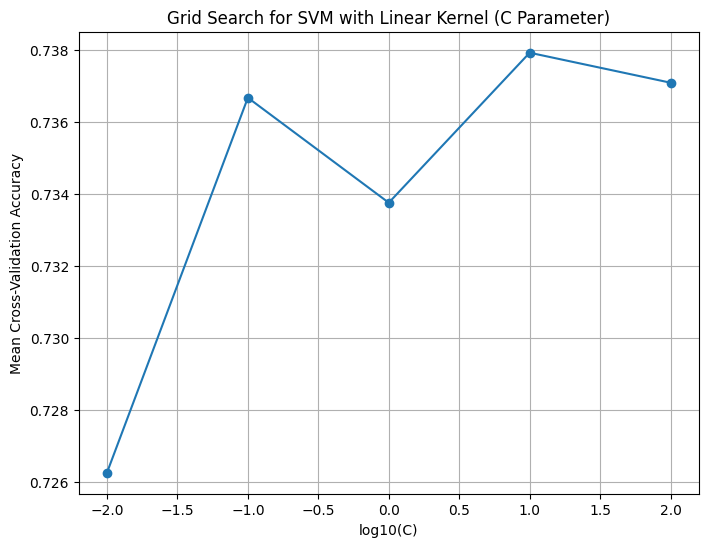

In [64]:
# plot the search grif to visualize the best parameter C
# Retrieve the mean cross-validated scores and corresponding C values
mean_scores = grid_search.cv_results_['mean_test_score']
C_values = param_grid['svc__C']

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(np.log10(C_values), mean_scores, marker='o')
plt.xlabel('log10(C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Grid Search for SVM with Linear Kernel (C Parameter)')
plt.grid(True)
plt.show()

    (3) Fit the Model with Chosen Parameters 

In [66]:
# Best parameter found for C
print("Best C parameter:", grid_search.best_params_)

# Best estimator (model with the best C)
best_model = grid_search.best_estimator_

Best C parameter: {'svc__C': 10}


    (4) Predicting Age Group with Test Data and Evaluate

In [68]:
# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7283333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65       125
           1       0.78      0.87      0.82       105
           2       0.75      0.60      0.66       131
           3       0.72      0.71      0.71       121
           4       0.81      0.81      0.81       118

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



 * *For comparison*, I fitted the data using a simple **Decision Tree** model and calculated the accuracy.

In [70]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       125
           1       0.73      0.78      0.75       105
           2       0.58      0.52      0.55       131
           3       0.57      0.58      0.57       121
           4       0.73      0.69      0.71       118

    accuracy                           0.62       600
   macro avg       0.63      0.63      0.63       600
weighted avg       0.62      0.62      0.62       600



<br>

## 5. Analysis and Results

    5-1. Results from EDA 
    5-2. Multilinear Regression Results
    5-3. Classification Results

### 5-1. Results from EDA

    1. Distribution of the data 
    
I wanted to ensure that my data was well-prepared for analysis and accurately represented real-world situations. To achieve this, I checked the distribution of each column. I used bar plots for categorical columns and histograms for numerical columns. For much of the data, such as Height, Weight, and Blood Pressure, it is natural to observe a bell-shaped (normal) distribution, as this reflects real-world patterns. However, for features like Gender and Age Group, it is important to have a distribution that is closer to uniform. In particular, since Age Group is used for classification later on, it needs to be balanced to ensure the modeling results are reliable and trustworthy.

    2. Collinearity
    
From the correlation plot and pair plot, I observed collinearity between several features. This was an interesting observation because collinearity can significantly impact the performance of a multilinear regression model.

Here, I want to examine a subset of the correlation plot in more detail to gain deeper insights.

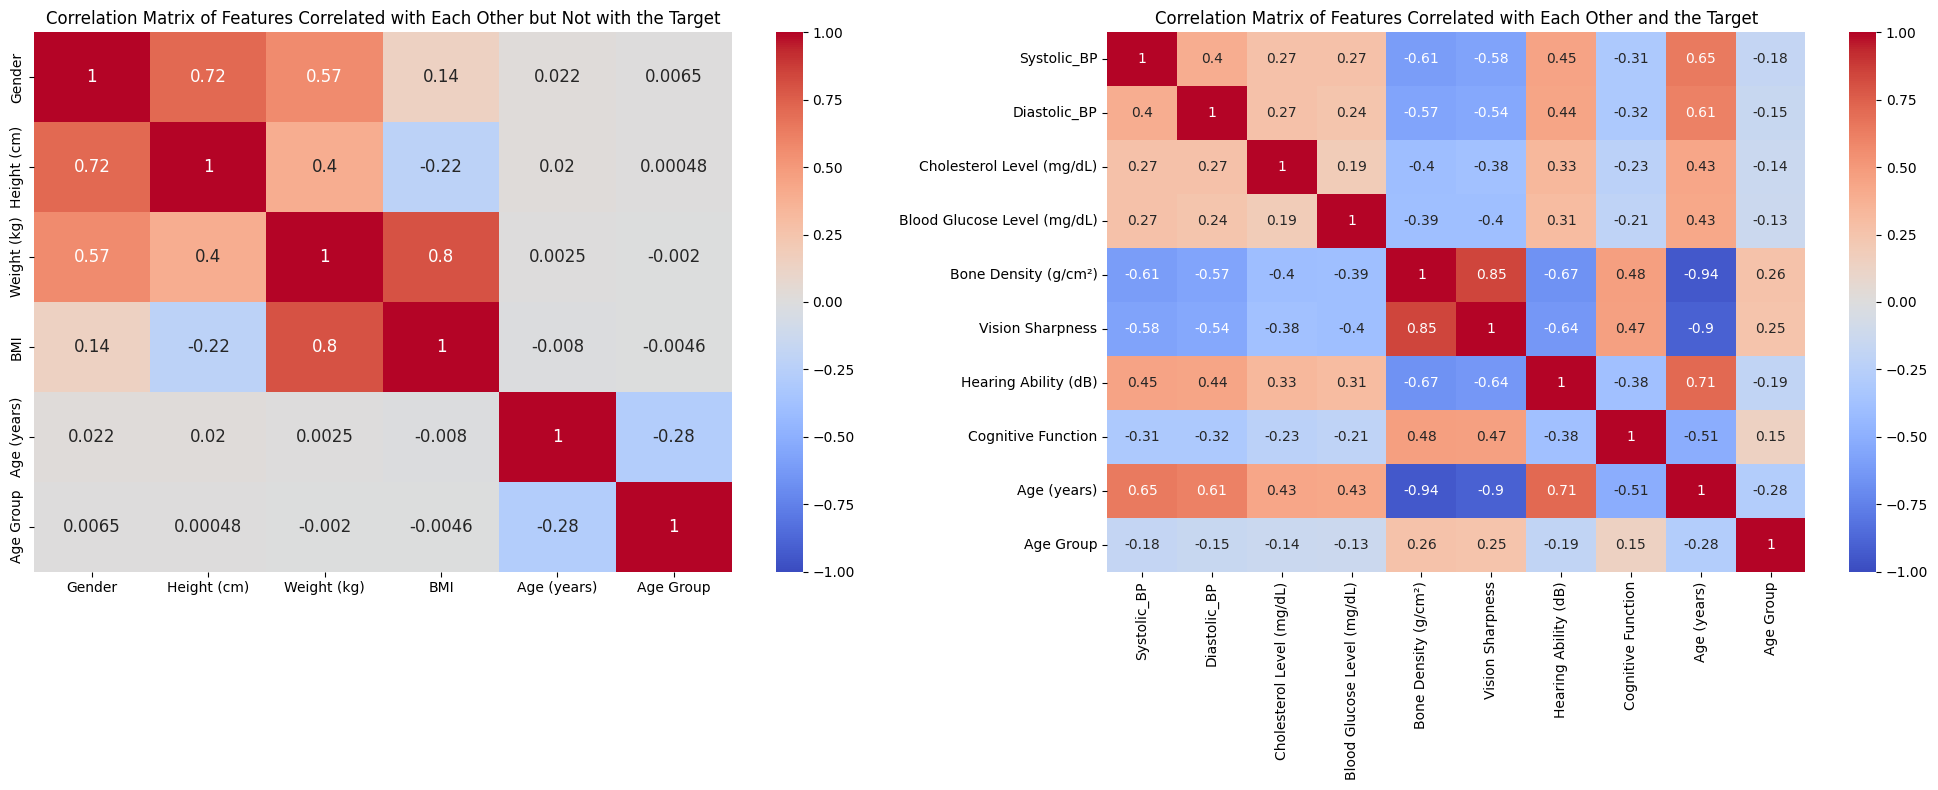

In [75]:
# Selecting columns that show collinearity
columns_of_collinear_1 = ['Gender', 'Height (cm)', 'Weight (kg)', 'BMI',  'Age (years)', 'Age Group']

columns_of_collinear_2 = ['Systolic_BP', 
    'Diastolic_BP', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 
    'Bone Density (g/cm²)', 'Vision Sharpness', 'Hearing Ability (dB)', 
    'Cognitive Function', 'Age (years)', 'Age Group']


df_collinear_1 = df_encoded[columns_of_collinear_1]
df_collinear_2 = df_encoded[columns_of_collinear_2]

# Creating two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plotting the first heatmap on the first subplot
sns.heatmap(df_collinear_1.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 12}, vmin=-1, vmax=1,ax=axes[0])
axes[0].set_title('Correlation Matrix of Features Correlated with Each Other but Not with the Target')

# Plotting the second heatmap on the second subplot
sns.heatmap(df_collinear_2.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 10}, vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Correlation Matrix of Features Correlated with Each Other and the Target')

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()

**First Correlation Matrix Analysis**

As you can see, features like 'Gender', 'Height', 'Weight', and 'BMI' are highly correlated with each other, but not with the target variable, 'Age (years)'. This suggests that while these features influence each other, they are unlikely to be significant predictors of 'Age'. In other words, 'Gender', 'Height', 'Weight', and 'BMI' may not play a major role in determining 'Age', but they are strongly interrelated.

**Second Correlation Matrix Analysis**

Looking at the second correlation matrix, you can observe the relationships between the target variable 'Age (years)' and other features. The colors indicate positive or negative correlations. In particular, 'Bone Density' has a strong negative correlation of -0.94 with 'Age', and 'Vision Sharpness' has a correlation of -0.90, both considered very high. However, features like 'Systolic_BP', 'Diastolic_BP', 'Cholesterol Level', 'Blood Glucose Level', 'Bone Density', 'Vision Sharpness', 'Hearing Ability', and 'Cognitive Function' are also correlated with each other. For example, 'Bone Density' and 'Vision Sharpness' have a correlation of 0.85. This suggests that in a multilinear regression model, we might not need both features since they provide overlapping information.

    
    3. Handling Outliers

For outlier detection, I used visualizations such as boxplots, scatter plots, and the z-score method. Through these visualizations, I identified some potential outliers. However, upon closer examination, even though these values fall outside the 3 standard deviations range, it is common in health data to encounter extreme values, such as very high cholesterol or unusual height. To ensure that my model reflects real-world scenarios, I chose not to remove these outliers from the dataset.

### 5-2. Multilinear Regression Results

Since I identified collinearity in the data, I decided to use VIF-based feature selection to address this issue. I calculated the VIF for each feature and systematically removed the features with the highest VIF values, focusing on those exceeding a threshold of 10.

Here is the final set of features that survived the **VIF-based** selection, along with their respective VIF values.

|   Feature  |  VIF |
|:-----------|:------|
|Gender | 1.940472|
|Bone Density (g/cm²)  |5.056227|
|Physical Activity Level| 3.246431|
| Smoking Status | 2.957212|
|Alcohol Consumption | 2.929190|
|Diet | 2.014148|
| Chronic Diseases | 5.599895|
| Medication Use | 2.985723|
| Family History|  4.160315|
|Mental Health Status|  3.569225|
|Sleep Patterns | 4.364470|
|Stress Levels | 4.991977|
|Pollution Exposure | 3.860627|
|Sun Exposure | 3.739152|
|Education Level | 2.502041|
|Income Level | 2.736138|


Next, I applied **backward selection**, starting with the full model and iteratively removing the feature with the highest p-value, to identify features with statistically significant coefficients.

The final form of the multilinear regression model is as follows: 

Let $X_1$ represent *Bone Density*, $X_2$ represent *Smoking Status*, and $y$ represent *Age (years)*:

$$
y = 94.6711 - 43.4237 X_1  - 0.6377 X_2
$$

To evaluate this model, I assessed the value of R-squared. R-squared, also known as the coefficient of determination, is a statistical measure that shows how well a regression model fits data. It is a value between 0 and 1, where 1 indicates a perfect fit. 

The R-squared value of this model on the *training data* was $0.883$, indicating that $88.3$% of the variance in the dependent variable $(y)$ is explained by the independent variables $(X_i)$. Similarly, the R-squared value on the *test data* was approximately $0.8645$, meaning that about $86.45$% of the variance in the dependent variable $(y)$ is explained by the independent variables $(X_i)$. The R-squared values, such as $0.883$, suggest a *strong relationship* between the variables, indicating that the model provides a good fit to the data.

<br>

### 5-3. Classification Results



    1. Reason why I use SVM

Since this dataset contains many real-valued features as well as categorical data, Support Vector Machine (SVM) is a suitable choice for classification. SVMs are effective in handling complex data and can work well with both continuous and categorical variables.

    2. Best Kernel and Best Parameter (C)

After performing a grid search to identify the best kernel, the results showed that the best kernel is 'linear'. I used five-fold cross-validation to compare the mean accuracy between the 'linear' and 'rbf' (Radial Basis Function) kernels, as 'rbf' is often the default kernel.

* Kernel = linear, Cross-validation mean accuracy: 0.736
* Kernel = rbf, Cross-validation mean accuracy: 0.208

It is clear that the 'linear' kernel is the better choice due to its significantly higher cross-validation accuracy.

For tuning the best parameter $C$, I tested the values $C = 0.01, 0.1, 1, 10$ , and $100$, and the best value for $C$ is found to be $10$.

    3. Evaluating Accuracy

After predicting the response with test data, I calculated accuracy along side with precision, recall, and f1-score. Accuracy is a good measure to assess classification model due to its easy interpretation.  

Here is the full Classification Report of SVM:

               precision    recall  f1-score   support

           0       0.61      0.69      0.65       125
           1       0.78      0.87      0.82       105
           2       0.75      0.60      0.66       131
           3       0.72      0.71      0.71       121
           4       0.81      0.81      0.81       118

    accuracy                            0.73 
    

*Note that the data is encoded so 0 = 'Young', 1 = 'Adults', 2 = 'Middle-aged', 3 = 'Senior', 4 = 'Elderly'*

The Support Vector Machine (SVM) model achieved an overall accuracy of $0.7283$ on the test data. While accuracy provides a general assessment of the model’s performance, it is essential to consider other metrics such as precision, recall, and F1-score for a more in-depth evaluation, especially in imbalanced datasets.

* Class 1 ('Adults') showed the highest precision ($0.78$) and recall ($0.87$), indicating the model performs well in identifying this class correctly.
* Class 0 ('Young') had a slightly lower precision ($0.61$) and recall ($0.69$), suggesting some difficulty in predicting this group accurately.
* Class 2 ('Middle-aged') had a lower recall ($0.60$), meaning the model missed some instances of this class, leading to a lower F1-score ($0.66$).
* Classes 3 ('Senior') and 4 ('Elderly') demonstrated more balanced precision, recall, and F1-scores around $0.71$ to $0.81$, indicating the model performs reasonably well in these age groups.


Overall, the SVM model seems to perform best in predicting 'Adults' and 'Elderly' groups, but has some room for improvement in the 'Young' and 'Middle-aged' categories.


For comparison, I also fitted the data using a simple Decision Tree model and calculated the accuracy, which resulted in $0.62$. In contrast, the SVM model achieved a higher accuracy of $0.73$. This suggests that, despite the higher computational complexity of SVM, its improved accuracy makes it a more suitable choice for this classification task. The SVM model demonstrates better predictive performance and is worth the extra computation compared to the simpler Decision Tree model. 

## 6. Conclusion and Discussion

* In this project, I initially contemplated whether to approach the problem using regression (predicting real-valued age) or classification (age group) and which method would provide more meaningful and accurate results, especially in real-world applications such as marketing or medical predictions.

* For regression, the final model using multilinear regression yielded an R-squared value of approximately $0.86$, which indicates that $86$% of the variance in the age data can be explained by the features used in the model. On the other hand, the Support Vector Machine (SVM) classification model achieved an accuracy of $0.73$. While R-squared and accuracy are not directly comparable since they are evaluating different aspects (regression vs. classification), both metrics suggest that the models perform well within their respective frameworks.

* **Discussion**: The multilinear regression analysis identified two key features, *'Bone Density'* and *'Smoking Status'*, as significant predictors of age. Particularly, *'Bone Density'* had a substantial impact, with a high negative coefficient. However, one practical limitation is that bone density can only be measured through specialized tests at medical facilities, making it less accessible for everyday use.
Given that there are other features, such as vision sharpness, that are highly correlated with bone density and easier to access in real-life situations, an interesting next step would be to remove *'Bone Density'* from the model. This could help explore whether other more practical features could serve as effective substitutes, and still provide accurate predictions. This might also open doors to more accessible applications of the model in industries like Marketing or Social Media, where predicting age without the need for complex medical tests could be valuable.